In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
player_info = pd.read_csv('clean_data/player_info.csv')
org_wins = pd.read_csv('clean_data/org_wins.csv')
player_wins = pd.read_csv('clean_data/player_wins.csv')

In [6]:
#player info eda

In [5]:
player_info.head()

,player_name,real_name,nationality,team,player_status,twitch_link,twitter_link,facebook_link,youtube_link,esl_link
0,0waRy,NaN,Japan,TSURUGI eSports,Active,NaN,https://twitter.com/OddKEI,NaN,NaN,NaN
1,1000Eyes,Tessa Steis,United States,NaN,Active,https://www.twitch.tv/thousand_eyes,https://twitter.com/1000EyesCasts,NaN,http://www.youtube.com/channel/UCzk_4ehD0XKb_T...,NaN
2,1Fumeta,Gabriel Reinhardt,Brazil,NaN,Active,https://www.twitch.tv/1fumeta,https://twitter.com/1_fumeta,NaN,http://www.youtube.com/channel/UCQFSafvLCeqBTj...,NaN
3,1ief,Peter Benney,Australia,NaN,Active,https://www.twitch.tv/1ief,https://twitter.com/1iefs,NaN,NaN,NaN
4,1ndraking,Sebastián Ezequiel Niz,Argentina,Pirate Dream Esports,Active,https://www.twitch.tv/1ndraking,https://twitter.com/1ndrakingg,NaN,http://www.youtube.com/channel/UCM2jRtKMyVATba...,NaN


In [ ]:
player_info.player_status.unique()

In [48]:
active_players = pd.DataFrame(player_info[player_info['player_status'] == 'Active'].nationality.value_counts().reset_index(), columns = ['nationality', 'count'])
retired_players = pd.DataFrame(player_info[player_info['player_status'] == 'Retired'].nationality.value_counts())
unkown_players = pd.DataFrame(player_info[player_info['player_status'] == 'Unkown'].nationality.value_counts())
banned_players = pd.DataFrame(player_info[player_info['player_status'] == 'Banned'].nationality.value_counts())
inactive_players = pd.DataFrame(player_info[player_info['player_status'] == 'Inactive'].nationality.value_counts())

In [49]:
active_players

,nationality,count
0,185,NaN
1,140,NaN
2,67,NaN
3,40,NaN
4,34,NaN
5,29,NaN
6,29,NaN
7,27,NaN
8,24,NaN
9,23,NaN


In [ ]:
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(ac, price[0:10])
 
# Show Plot
plt.show()

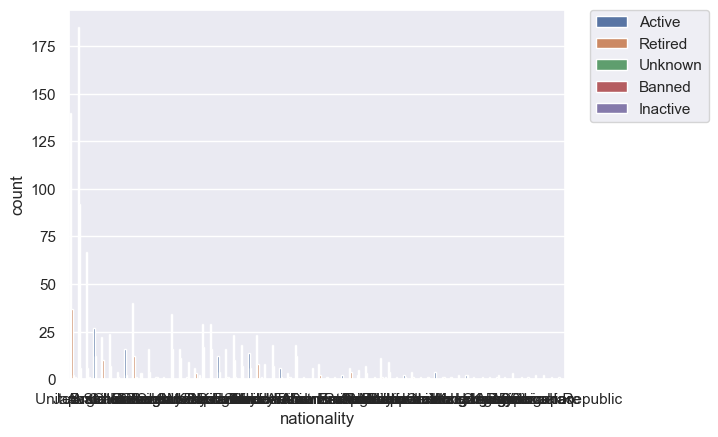

In [27]:
sns.countplot(data=player_info, x='nationality', hue='player_status')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

NameError: name 'count' is not defined

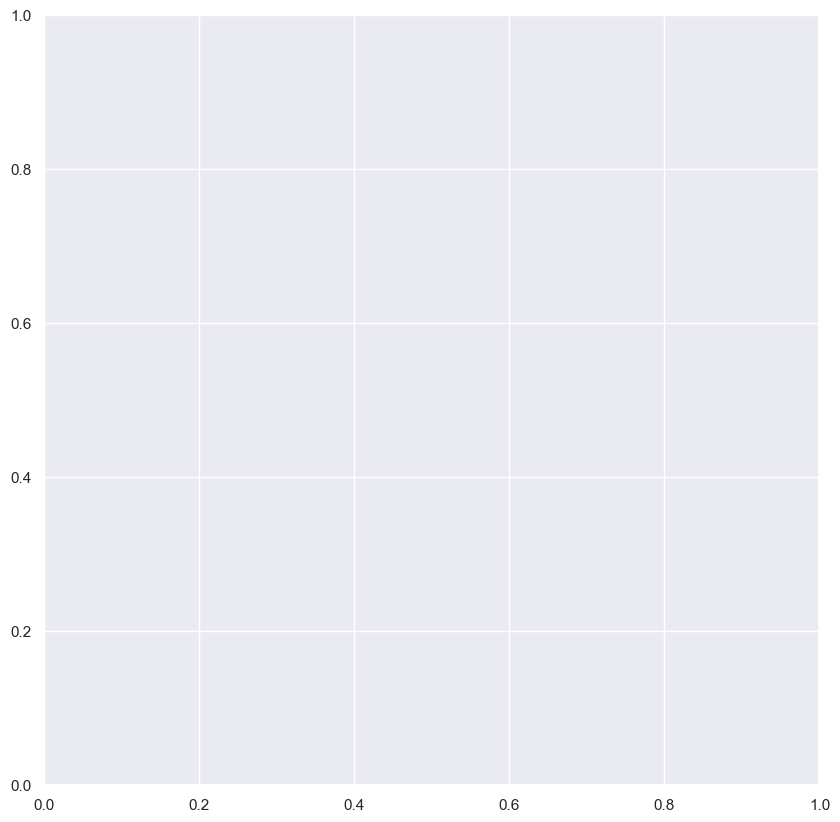

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=player_info,y=count, x='nationality', hue='player_status', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale = 2)
plt.show()